<a href="https://colab.research.google.com/github/LanucciG/ml_cluster/blob/main/Guilherme_Recomendador_de_musicas_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Análise e Pré-processamento de dados

Quem nunca notou como as músicas que ouvimos no modo aleatório em aplicativos de música parecem estar longe de ser aleatórias? Já pensou como um aplicativo pode nos recomendar uma música com tanta precisão? E não é só com apps de música ou streaming; até em vídeos, como quando um serviço sugere “Se você gostou deste filme, talvez goste de outros” ou o YouTube oferece “Vídeos relacionados ao lado”.

Como esses algoritmos funcionam? Como eles definem e geram essas recomendações? Nesta aula, vamos explorar como construir um sistema de recomendação de músicas utilizando coletados a partir de uma API disponibilizado pelo Spotify.




[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

## 1.1 Dicionário dos dados

Os dados necessários para desenvolver todo o nosso trabalho foram retirados da API do Spotify e já foram previamente tratados.

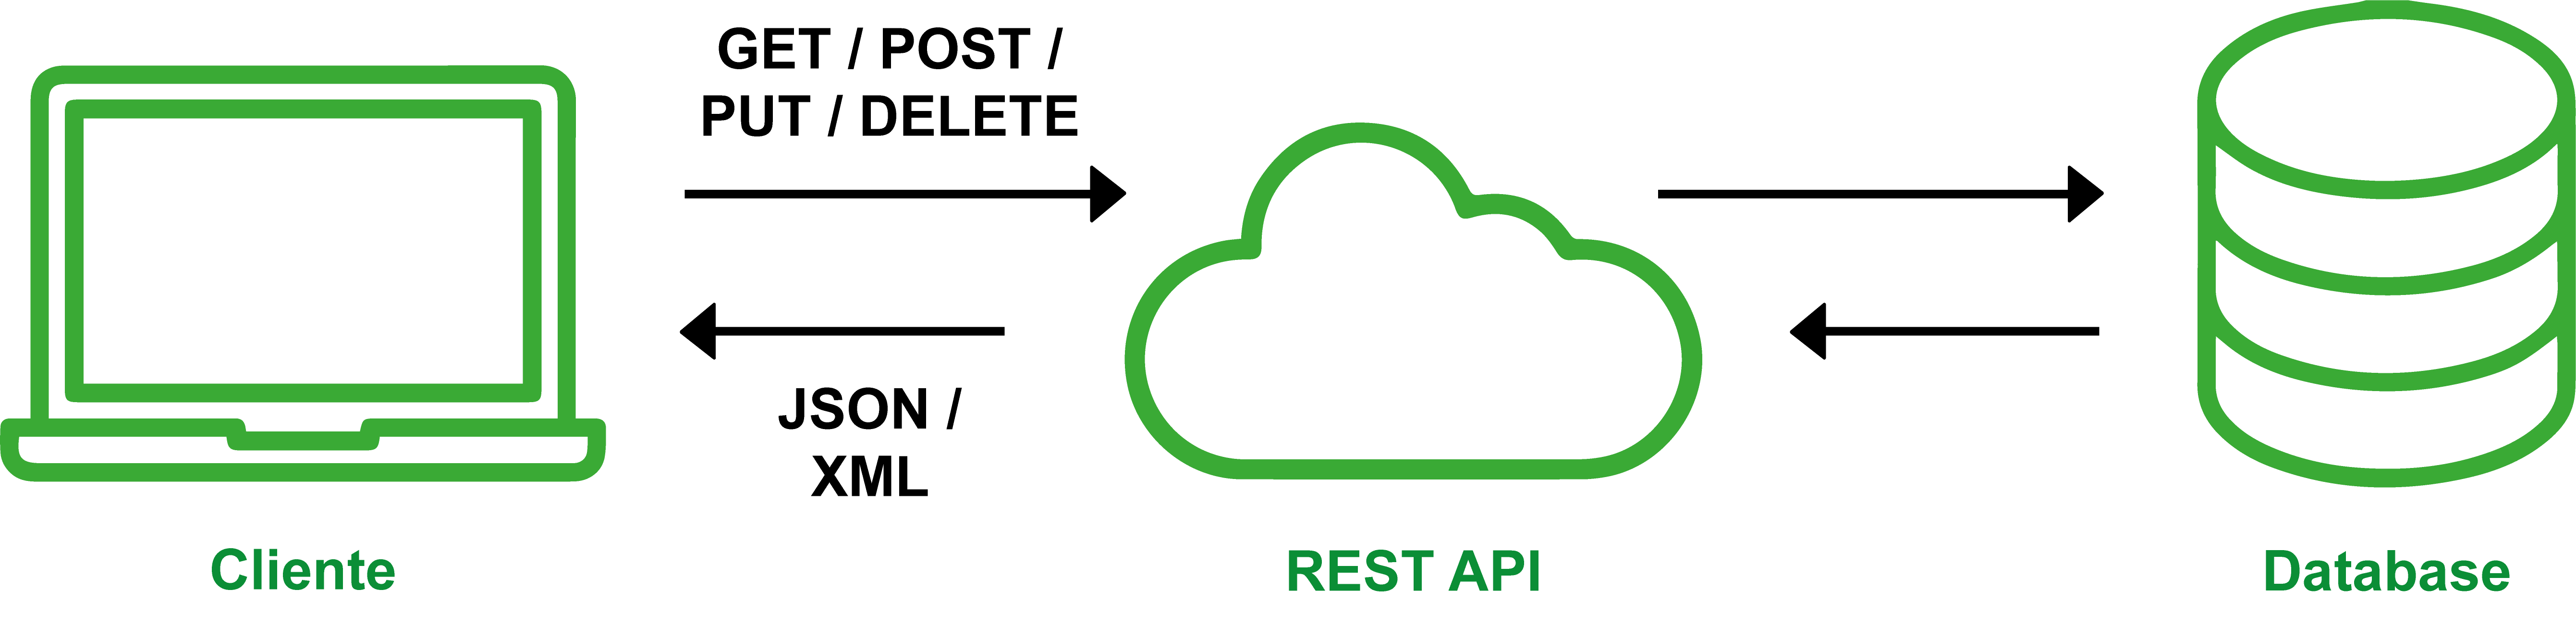

É importante conhecer o básico sobre os conceitos de retirada dos dados. API é a abreviação para Application Programming Interface, que em uma tradução livre pode ser Interface de Programação de Aplicação. Ela funciona como um atalho para o banco de dados, com uma série de padrões e protocolos e a API do Spotify funciona utilizando os princípios REST, que nos retornam arquivos json com os metadados das informações requeridas, como artista, música, álbum e faixa, que são retirados diretamente do catálogo do Spotify.



* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## 1.2 Analise dos dados

### Importando e vizualindo dados

Obs.: crie um repositório no seu github (dados_totais, dados_generos e dados_anos)

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dados1 = pd.read_csv('https://raw.githubusercontent.com/ThalitaVS/ml_Cluster/main/Dados_totais.csv')
dados1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [ ]:
dados2 = pd.read_csv('https://raw.githubusercontent.com/ThalitaVS/ml_Cluster/main/data_by_genres.csv')
dados2.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
dados3 = pd.read_csv('https://raw.githubusercontent.com/ThalitaVS/ml_Cluster/main/data_by_year.csv')
dados3.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


### Verificando o tipo dos dados e seus valores

1.   Item de lista
2.   Item de lista



#### Dados Dados_Totais

In [ ]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   explicit          20311 non-null  int64  
 8   id                20311 non-null  object 
 9   instrumentalness  20311 non-null  float64
 10  key               20311 non-null  int64  
 11  liveness          20311 non-null  float64
 12  loudness          20311 non-null  float64
 13  mode              20311 non-null  int64  
 14  name              20311 non-null  object 
 15  popularity        20311 non-null  int64  
 16  speechiness       20311 non-null  float6

In [ ]:
dados1["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados1.shape

(20311, 19)

In [ ]:
dados_gerais = dados1.drop(["explicit","key","mode"], axis = 1)
dados_gerais.head(2) #escolher o que entra de caract. no seu sistema

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson


In [ ]:
dados1.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,20311.000000,20311.000000,20311.000000,20311.000000,2.031100e+04,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000,20311.000000
mean,0.481928,2010.183201,0.242799,0.587702,2.286290e+05,0.650766,0.279504,0.060173,5.239673,0.194004,-7.083095,0.659052,56.441879,0.100602,122.074260
std,0.246413,6.063968,0.284416,0.171322,7.046523e+04,0.221774,0.448766,0.199315,3.583479,0.157758,4.320102,0.474040,11.560951,0.106060,30.865188
min,0.000000,2000.000000,0.000000,0.000000,3.030100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288000,2005.000000,0.016700,0.477000,1.920000e+05,0.516000,0.000000,0.000000,2.000000,0.097600,-8.110000,0.000000,48.000000,0.035700,96.117500
50%,0.472000,2010.000000,0.114000,0.596000,2.216270e+05,0.680000,0.000000,0.000002,5.000000,0.128000,-6.072000,1.000000,56.000000,0.052400,120.109000
75%,0.672000,2015.000000,0.395000,0.714000,2.561330e+05,0.826000,1.000000,0.000512,8.000000,0.248000,-4.629500,1.000000,64.000000,0.116000,143.667500
max,1.000000,2020.000000,0.996000,0.986000,2.558287e+06,0.999000,1.000000,1.000000,11.000000,0.997000,1.483000,1.000000,100.000000,0.950000,220.099000


#### Dados Data by genes

In [ ]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
dados2.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [ ]:
dados_generos = dados2.drop(["key","mode"], axis = 1)
dados_generos.head(2) #escolher o que entra de caract. no seu sistema

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000


#### Dados Data by year

In [ ]:
dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [ ]:
dados3.describe()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


### Verificando a existência de dados Null e NaN

#### Dados Dados_Totais

In [ ]:
dados_gerais.isnull().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
id,0
instrumentalness,0
liveness,0


In [ ]:
dados_gerais.isna().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
id,0
instrumentalness,0
liveness,0


#### Dados Data by genes

In [ ]:
dados_generos.isnull().sum()

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


In [ ]:
dados_generos.isna().sum()

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


#### Dados Data by year

In [ ]:
dados3.isnull().sum()

,0
mode,0
year,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0


In [ ]:
dados3.isna().sum()

,0
mode,0
year,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0


## 1.3 Análise gráfica

### Análise temporal (dados_anos)

Use o código seguinte para plotar a variação de algumas features ao longo dos anos.



```
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))

fig.show()

```

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados3['year'], y=dados3['speechiness'],
                    name='Speechiness'))

fig.show()

### Análise de Correlação de Features



```
import plotly.express as px
fig = px.imshow(dados_gerais.drop(['artists', 'id', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()
```


In [ ]:
import plotly.express as px
fig = px.imshow(dados1.drop(['artists', 'id', 'name', 'artists_song'],axis=1).corr(), text_auto=True)
fig.show()

# 2 - Clusterização por música

Quando lidamos com um problema de agrupamento, queremos usar um algoritmo que descubra grupos significativos nos dados, como é o nosso caso, queremos criar agrupamentos de músicas. Seja para qualquer outro fim, o algoritmo descobre os grupos sem intervenções externas, já que não precisa de rótulos para realizar previsões.

Um algoritmo clássico de clusterização é o K-means, que tenta organizar os dados em um número k de clusters (grupos), que definimos iicialmente, e, a partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível. O cálculo das semelhanças é feito utilizando a distância euclidiana ou uma linha reta comum entre dois pontos. Quanto menor a distância euclidiana, mais próximo os dois pontos estão e mais semelhantes eles são por consequência.

O processo de como o K-means funciona é relativamente simples e repetitivo.

1.  O usuário define o valor de clusters (k);
2.  O K-means seleciona um ponto aleatório para cada centróide, temos k-centróides nesse ponto, e um centróide é o ponto em torno do qual cada cluster é construído;
3. A distância euclidiana é calculada entre cada ponto e cada centróide, e, a partir disto, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana);
4. O algoritmo calcula a média da distância euclidiana entre cada ponto do cluster e o centróide para definir um novo centróide;
5. O processo 4 se repete até que os centróides dos clusters não se movam mais.

Veja a uma animação de como esse processo acontece no [K-Means Clustering Demo.](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)


Repita as etapas anteriores para base dados_gerais. Atenção, para essa base será necessário utilizar a conversão OneHotEnconder previamente.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype = int)
colunas_ohe = ohe.fit_transform(dados_gerais[['artists']]).toarray()
dados_ohe = pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))
dados_totais2 = dados_gerais.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados_totais2, dados_ohe], axis=1)
dados_musicas_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


## 2.1 - One Hot Encoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Aplicando OneHotEncoder nas colunas categóricas
ohe = OneHotEncoder()
ohe.fit(dados1[['artists']])
artistas_encoded = ohe.transform(dados1[['artists']]).toarray()

# Criando um novo DataFrame com as colunas codificadas
artistas_encoded_df = pd.DataFrame(artistas_encoded, columns=ohe.get_feature_names_out(['artists']))

# Concatenando o DataFrame codificado com o DataFrame original
dados1_encoded = pd.concat([dados1, artistas_encoded_df], axis=1)

# Removendo as colunas originais 'artists', 'id', 'name' e 'artists_song'
dados1_encoded = dados1_encoded.drop(['artists', 'id', 'name', 'artists_song'], axis=1)

# Aplicando PCA e StandardScaler
pca_pipeline_musicas = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
musicas_embedding_pca = pca_pipeline_musicas.fit_transform(dados1_encoded)
projection_musicas = pd.DataFrame(columns=['x', 'y'], data=musicas_embedding_pca)

# Aplicando K-Means
kmeans_pca_musicas = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca_musicas.fit(projection_musicas)

# Adicionando informações de cluster ao DataFrame
dados1['cluster_pca'] = kmeans_pca_musicas.predict(projection_musicas)
projection_musicas['cluster_pca'] = kmeans_pca_musicas.predict(projection_musicas)

# Plotando os clusters
fig = px.scatter(projection_musicas, x='x', y='y', color='cluster_pca')
fig.show()

# Avaliando a variância explicada pelo PCA
print("Variância explicada (ratio):", pca_pipeline_musicas[1].explained_variance_ratio_.sum())
print("Variância explicada:", pca_pipeline_musicas[1].explained_variance_.sum())


Initialization complete
Iteration 0, inertia 44367.12191561344.
Iteration 1, inertia 33215.83873977734.
Iteration 2, inertia 31411.895466970745.
Iteration 3, inertia 30908.70108961013.
Iteration 4, inertia 30771.4988020963.
Iteration 5, inertia 30731.886454711403.
Iteration 6, inertia 30717.356012614848.
Iteration 7, inertia 30713.01916724442.
Converged at iteration 7: center shift 0.00014692994143281377 within tolerance 0.0003380817569417441.
Initialization complete
Iteration 0, inertia 40469.66124551054.
Iteration 1, inertia 30409.62048471912.
Iteration 2, inertia 28636.2117175507.
Iteration 3, inertia 28049.986756909784.
Iteration 4, inertia 27834.657923842606.
Iteration 5, inertia 27736.225780676778.
Iteration 6, inertia 27696.108913884356.
Iteration 7, inertia 27683.183229556205.
Iteration 8, inertia 27678.34709697085.
Converged at iteration 8: center shift 0.00019721914394656224 within tolerance 0.0003380817569417441.
Initialization complete
Iteration 0, inertia 44234.00471705619

Variância explicada (ratio): 0.007597342852623467
Variância explicada: 6.761968060308977


Utilize o onehotenconder para transformar a coluna de 'artists' em dado numericos

In [ ]:
import pandas as pd
# Aplicando OneHotEncoder na coluna 'artists'
ohe = OneHotEncoder()
ohe.fit(dados1[['artists']])
artistas_encoded = ohe.transform(dados1[['artists']]).toarray()

# Criando um novo DataFrame com as colunas codificadas
artistas_encoded_df = pd.DataFrame(artistas_encoded, columns=ohe.get_feature_names_out(['artists']))

# Concatenando o DataFrame codificado com o DataFrame original
dados1_encoded = pd.concat([dados1, artistas_encoded_df], axis=1)

# Removendo a coluna original 'artists'
dados1_encoded = dados1_encoded.drop(['artists'], axis=1)

print(dados1_encoded.head())

   valence  year  acousticness  danceability  duration_ms  energy  explicit  \
0    0.285  2000       0.00239         0.429       266773   0.661         0   
1    0.613  2000       0.14300         0.843       270507   0.806         1   
2    0.400  2000       0.00958         0.556       216880   0.864         0   
3    0.543  2000       0.00664         0.545       233933   0.865         0   
4    0.760  2000       0.03020         0.949       284200   0.661         1   

                       id  instrumentalness  key  ...  artists_Zara Larsson  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121   11  ...                   0.0   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4  ...                   0.0   
2  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3  ...                   0.0   
3  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11  ...                   0.0   
4  3yfqSUWxFvZELEM4PmlwIR          0.000000    5  ...                   0.0   

   artists_Zedd  artists_alt-J artists_blackbear  

## 2.2 - Padronização e Redução de dimensionalidade em pipeline

Atenção, crie um pipeline removendo as colunas:
'artists_song', 'id','name','artists_song', "explicit", "key", "mode"

In [ ]:
dados_musicas_dummies.head()

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
# Criando um pipeline com StandardScaler e PCA, removendo as colunas especificadas
pca_pipeline_musicas = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components=0.7, random_state=SEED))])

# Aplicando a pipeline aos dados reduzidos
musicas_embedding_pca = pca_pipeline_musicas.fit_transform(dados_musicas_dummies.drop(['id', 'name', 'artists_song'], axis=1))

# Criando um DataFrame com as projeções
projection_musicas = pd.DataFrame(data=musicas_embedding_pca)
print(projection_musicas)

            0         1         2         3         4         5         6    \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

            7         8         9    ...       602 

## 2.3 - Aplicação do cluster com K-Means

In [ ]:
# Aplicando K-Means
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=True, random_state=SEED)
kmeans_pca_pipeline.fit(projection_musicas)

# Adicionando informações de cluster ao DataFrame
dados_gerais['cluster_pca'] = kmeans_pca_pipeline.predict(projection_musicas)
projection_musicas['cluster_pca'] = kmeans_pca_pipeline.predict(projection_musicas)
projection_musicas['artists'] = dados_gerais['artists']
projection_musicas['song'] = dados_gerais['artists_song']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 11957371.00916321.
Iteration 1, inertia 11595973.296573667.
Iteration 2, inertia 11591308.984878197.
Iteration 3, inertia 11588454.508905405.
Iteration 4, inertia 11586942.671137672.
Iteration 5, inertia 11585323.53325345.
Iteration 6, inertia 11584041.073545657.
Iteration 7, inertia 11582893.13500662.
Iteration 8, inertia 11581777.298974404.
Iteration 9, inertia 11580816.792376256.
Iteration 10, inertia 11580217.873108944.
Iteration 11, inertia 11579840.035573503.
Iteration 12, inertia 11579557.934597395.
Iteration 13, inertia 11579374.099059999.
Iteration 14, inertia 11579266.629109742.
Iteration 15, inertia 11579189.396065537.
Iteration 16, inertia 11579131.024284963.
Iteration 17, inertia 11579090.258559417.
Iteration 18, inertia 11579062.365823029.
Iteration 19, inertia 11579043.480320375.
Iteration 20, inertia 11579023.336650327.
Iteration 21, inertia 11579008.680724347.
Iteration 22, inertia 11578998.288779104.
Iteration 23, inertia 1

## 2.4 - Plotando o cluster

In [ ]:
# Plotando o cluster

fig = px.scatter(projection_musicas, x=0, y=1, color='cluster_pca', hover_data=[0,1,'song'])
fig.show()

#as colunas estão coordenadas por onde de % representação

In [ ]:
cluester0 = projection_musicas[projection_musicas['cluster_pca'] == 0]
cluester1 = projection_musicas[projection_musicas['cluster_pca'] == 1]
cluester2 = projection_musicas[projection_musicas['cluster_pca'] == 2]

#query data frame
cluester0.song.head(10)

#query data frame
# cluester0.head(10)

,song
1371,Miguel - Sure Thing
1392,Miguel - Girl With The Tattoo Enter.lewd
1482,Miguel - All I Want Is You
1735,Miguel - Adorn
2389,Miguel - waves - Tame Impala Remix
2458,Miguel - Sky Walker (feat. Travis Scott)
2520,Miguel - Come Through and Chill (feat. J. Cole...
4244,Miguel - Quickie
4420,Miguel - How Many Drinks?
6481,Miguel - Vixen


In [ ]:
dados_gerais.head()
dados_gerais.describe()
dados_gerais[dados_gerais['cluster_pca'] == 1].describe()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,cluster_pca
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,0.518937,2007.884354,0.128959,0.729789,270995.095238,0.760739,0.001079,0.269388,-4.703007,60.142857,0.267486,114.993116,1.0
std,0.219444,5.808021,0.146424,0.125469,69012.689907,0.141254,0.009534,0.195079,3.259462,9.612349,0.135050,34.304295,0.0
min,0.026900,2000.000000,0.001700,0.306000,33107.000000,0.098700,0.000000,0.041200,-22.723000,44.000000,0.046600,72.532000,1.0
25%,0.372000,2003.500000,0.030350,0.652500,245659.500000,0.672000,0.000000,0.116000,-5.480000,53.000000,0.181000,87.005500,1.0
50%,0.545000,2009.000000,0.078300,0.731000,281120.000000,0.768000,0.000000,0.205000,-4.195000,59.000000,0.259000,100.894000,1.0
75%,0.685000,2013.000000,0.189500,0.812500,311833.500000,0.872500,0.000000,0.358000,-3.109000,67.500000,0.350500,141.025500,1.0
max,0.962000,2020.000000,0.993000,0.963000,434077.000000,0.972000,0.112000,0.935000,0.496000,86.000000,0.846000,182.973000,1.0


# 3 - Sistemas de Recomendação

## 3.1 - Spotify

In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
#importando as bibliotecas de autenticação
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np

In [ ]:
client_credential_manager = SpotifyClientCredentials(client_id = '9ad4d97b823249dd8a119a6ff83e8114', client_secret = '812c63997faa47018eafc948de7b8219')

sp = spotipy.Spotify(client_credentials_manager=client_credential_manager)

### 3.2 Recomendação da música


In [ ]:
projection_musicas.head()

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artists,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,1.486407e-12,3.531045e-12,2.280053e-12,4,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,-2.464925e-13,5.306577e-12,-2.796485e-12,4,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,4.558216e-12,-1.558605e-12,4.828843e-13,13,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,6.708449e-12,-1.099622e-12,8.252141e-12,4,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,1.104427e-12,5.119421e-13,2.423425e-13,1,Eminem,Eminem - The Real Slim Shady


In [ ]:
musica = '3 Doors Down - Kryptonite'

In [ ]:
# projection_musicas[projection_musicas['song'] == musica]

projection_musicas[projection_musicas['song'] == musica]['cluster_pca']

,cluster_pca
3,4


In [ ]:
cluster = projection_musicas[projection_musicas['song'] == musica]['cluster_pca'].iloc[0]
x_musica = projection_musicas[projection_musicas['song'] == musica][0].iloc[0]
y_musica = projection_musicas[projection_musicas['song'] == musica][1].iloc[0]

In [ ]:
print(cluster)
print(x_musica)
print(y_musica)

4
-0.9264638725159744
1.292090959077367


In [ ]:
musicas_recomendadas = projection_musicas[projection_musicas['cluster_pca'] == cluster]
musicas_recomendadas[[0,1,'song']]

,0,1,song
0,0.174796,0.731252,Coldplay - Yellow
1,-1.358420,0.052935,OutKast - Ms. Jackson
3,-0.926464,1.292091,3 Doors Down - Kryptonite
5,-1.850492,1.129255,Disturbed - Down with the Sickness
6,-1.241322,0.534152,Nelly - Ride Wit Me
...,...,...,...
20301,-0.981527,-0.562332,Miley Cyrus - Zombie (Live from the NIVA Save ...
20302,-1.146042,-1.893514,YoungBoy Never Broke Again - Red Eye
20303,-1.682054,-2.580833,"Rauw Alejandro - Elegí (feat. Farruko, Anuel A..."
20304,-1.290731,-3.601878,Polo G - Trials & Tribulations


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica,y_musica]])

musicas_recomendadas['distancias'] = distancias
musicas_recomendadas = musicas_recomendadas.sort_values('distancias')
musicas_recomendadas[['song', 'distancias']]

<ipython-input-48-41b37e61a971>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,song,distancias
3,3 Doors Down - Kryptonite,0.000000
17624,Montez de Durango - Quiero Saber De Ti,0.013320
12776,Tim McGraw - Felt Good On My Lips,0.014266
7892,Avril Lavigne - Anything but Ordinary,0.022835
6114,Three Days Grace - On My Own,0.029469
...,...,...
2874,Polo G - Martin & Gina,5.850401
13716,21 Savage - Snitches & Rats (Interlude),5.943816
2857,Cardi B - WAP (feat. Megan Thee Stallion),6.008707
5398,$NOT - GOSHA,6.233674


## 3.3 - Gerar imagem do album


In [ ]:
dados_gerais.head(7)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song,cluster_pca
0,0.285,2000,0.002390,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow,4
1,0.613,2000,0.143000,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson,4
2,0.400,2000,0.009580,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End,13
3,0.543,2000,0.006640,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite,4
4,0.760,2000,0.030200,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady,1
5,0.941,2000,0.000996,Disturbed,0.695,279213,0.876,40rvBMQizxkIqnjPdEWY1v,0.000007,0.1060,-4.262,Down with the Sickness,76,0.0553,89.954,Disturbed - Down with the Sickness,4
6,0.722,2000,0.061600,Nelly,0.850,291782,0.700,3Gf5nttwcX9aaSQXRWidEZ,0.000002,0.2440,-6.490,Ride Wit Me,74,0.0478,101.875,Nelly - Ride Wit Me,4


In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Achando o ID
nome_musica = 'Coldplay - Yellow'
id_musica = dados_gerais[dados_gerais['artists_song'] == nome_musica]['id'].iloc[0]
print(id_musica)

3AJwUDP919kvQ9QcozQPxg


In [ ]:
track = sp.track(id_musica)
track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'},
    'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU',
    'id': '4gzpq5DPGxSnKTe4SA8HAU',
    'name': 'Coldplay',
    'type': 'artist',
    'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   

In [ ]:
url = track['album']['images'][0]['url']

In [ ]:
name = track['name']
name

'Yellow'

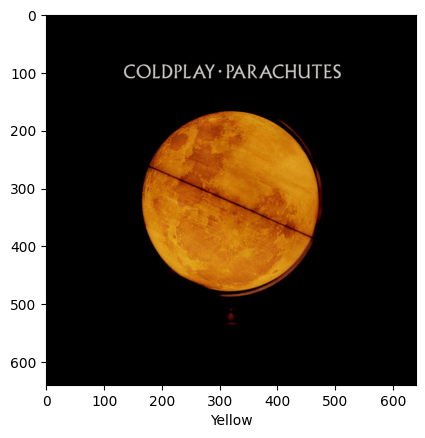

In [ ]:
import matplotlib.pyplot as plt
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [ ]:
def recommended_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][0]['url'])
    name.append(track['name'])
  return name, url

In [ ]:
id_recomendadas = ['3AJwUDP919kvQ9QcozQPxg', '0I3q5fE6wg7LIfHGngUTnV']

In [ ]:
name_recomendadas, url_recomendadas = recommended_id(id_recomendadas)

In [ ]:
recommended_id(id_recomendadas)

(['Yellow', 'Ms. Jackson'],
 ['https://i.scdn.co/image/ab67616d0000b2739164bafe9aaa168d93f4816a',
  'https://i.scdn.co/image/ab67616d0000b2732350e31bc346a6c20e9de166'])

In [ ]:
url_recomendadas

['https://i.scdn.co/image/ab67616d0000b2739164bafe9aaa168d93f4816a',
 'https://i.scdn.co/image/ab67616d0000b2732350e31bc346a6c20e9de166']

## 3.4 - Função Lista de ID´s recomendados

ID da música: 6mDpUEYNqfdDQ0OWfjLIhX, Nome da música: Paranoid
ID da música: 7oNCvSzpeW7JLfYy00MYA2, Nome da música: I Got (feat. Pimp C & Project Pat) - Explicit Album Version
ID da música: 7dI2aYLZuGZYLcxVOtL3pq, Nome da música: The Palisades
ID da música: 2nLgWMdYPO35GGpwX2xo23, Nome da música: Monophobia
ID da música: 5css8d6tc4sYLpjBNRVCO0, Nome da música: Cabin By the Sea
ID da música: 2jGjNCH6Op0BqBHPc4Rd8d, Nome da música: Lovely
ID da música: 54s6sdPuMjVtdB5d5KFzTC, Nome da música: Save Me
ID da música: 6ltYnjVswCQtRdxmRjCG35, Nome da música: Cómo Te Voy A Olvidar
ID da música: 3mkNZA4Q0dYvZIn6OZEmOz, Nome da música: Familiar Taste of Poison
ID da música: 04ccQGJ1i8gL7JoeCPiJbv, Nome da música: Don't Happen Twice


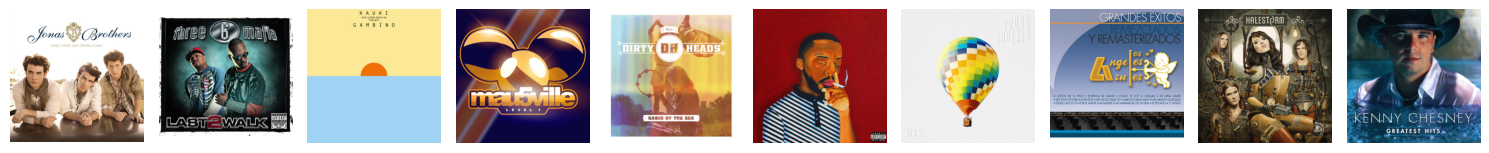

In [ ]:
import matplotlib.pyplot as plt
def recommended_id(playlist_id):
  """
  Retorna uma lista de nomes e URLs de imagens de álbuns para uma lista de IDs de músicas.

  Args:
    playlist_id: Uma lista de IDs de músicas.

  Returns:
    Uma tupla contendo duas listas:
      - name: Uma lista de nomes das músicas.
      - url: Uma lista de URLs das imagens dos álbuns.
  """
  url = []
  name = []
  for i in playlist_id:
    try:
      track = sp.track(i)
      url.append(track['album']['images'][0]['url'])
      name.append(track['name'])
    except Exception as e:
      print(f"Erro ao obter informações para ID {i}: {e}")
  return name, url


def show_images_horizontally(playlist_id):
  """
  Mostra as imagens dos álbuns das músicas em uma lista horizontalmente,
  juntamente com os IDs e nomes das músicas.

  Args:
    playlist_id: Uma lista de IDs de músicas.
  """
  fig, axes = plt.subplots(1, len(playlist_id), figsize=(15, 5))
  for i, id_musica in enumerate(playlist_id):
    try:
      track = sp.track(id_musica)
      url = track['album']['images'][0]['url']
      name = track['name']
      image = io.imread(url)
      axes[i].imshow(image)
      axes[i].set_xlabel(name, fontsize=10)
      axes[i].axis('off')
      print(f"ID da música: {id_musica}, Nome da música: {name}")
    except Exception as e:
      print(f"Erro ao obter imagem para ID {id_musica}: {e}")

  plt.tight_layout()
  plt.show()


# Exemplo de uso:
num_ids_recomendados = 10
ids_recomendados = recommended_id_random(num_ids_recomendados)  # Substitua por sua função para gerar IDs recomendados
show_images_horizontally(ids_recomendados)


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def musicas_recomendadas(musica):
  cluster = list(projection_musicas[projection_musicas['song'] == musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_musicas[projection_musicas['cluster_pca'] == cluster][[0,1,'song']]
  x_musica = projection_musicas([projection_musicas['song'] == musica][0])[0]
  y_musica = projection_musicas([projection_musicas['song'] == musica][0])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica,y_musica]])
  musicas_recomendadas['id'] = dados_gerais['id']
  musicas_recomendadas['distancias'] = distancias
  musicas_recomendadas = musicas_recomendadas.sort_values('distancias')
  lista_id_recomendadas = list(musicas_recomendadas['id'])

  return lista_id_recomendadas

def imagens_recomendadas(lista_id_recomendadas):
  url = []
  name = []
  for i in lista_id_recomendadas:
    track = sp.track(i)
    url.append(track['album']['images'][0]['url'])
    name.append(track['name'])
  return name, url

def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url):
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=False)
    plt.show()


## 3.5 - Main()

In [ ]:
musica = 'Coldplay - Yellow'
ids = musicas_recomendadas(musica)
name, url = imagens_recomendadas(ids)
visualize_songs(name, url)